### 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns" , None)

### 2) Importing the dataset and finding info about it

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
df.info()         # Info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
df["Date"] = pd.to_datetime(df["Date"])           # Converting it into datetime feature since earlier it was in string

In [5]:
df["Year"] = df["Date"].dt.year               # Making a column for year using the above created datetime 
df["Month"] = df["Date"].dt.month             # Making a column for month using the above created datetime

In [6]:
df.head()                       # Observing the first 5 observation of our data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008,12


In [7]:
data = df.copy()   # Creating a copy of the dataset for further use ( We will name it as "backup data ") 
data1 = df.copy()  # Creating another copy of the dataset for further use (We will name it as "backup data 1")

In [8]:
data.isnull().sum()     # Total number of null values in the dataset featurewise

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
dtype: int64

### 3) Data Cleaning

#### 3)(a) Handling Missing values

Here we will be using a two data approach in order to find which missing value imputation is better and why.

The first approach is the normal mean/median/mode imputaion where we simply fill the NaN values with the mean/median/mode according to our needs.

##### 3(a)(i) First Approach

Since we are using the first approach i.e. Mean/Median/Mode imputation, we have to understand that a data has features with different datatypes.So first we will be dealing with features having categorical data.

Here we will use the backup data which we previously mentioned under the heading (2)Importing the dataset and finding info about it in order to compare as well.

In [9]:
# Categorical features

First, I will be following the few steps:-
   - Create a copy of the dataset with the name df_copy.
   - Impute mean/median/mode with respect to different columns as we did earlier.
   - Compare them by using a kde plot.

In [10]:
df_copy = df.copy()          # Making a copy of the dataset

In [11]:
# Converting the target variable "RainToday" and "RainTomorrow" to binary in the df_copy data.
df_copy["RainToday"] = np.where(df_copy["RainToday"] == "Yes" , 1 , 0)
df_copy["RainTomorrow"] = np.where(df_copy["RainTomorrow"] == "Yes" , 1 , 0)

In [12]:
# Converting the target variable "RainToday" and "RainTomorrow" to binary in the backup data.
data["RainToday"] = np.where(data["RainToday"] == "Yes" , 1 , 0)
data["RainTomorrow"] = np.where(data["RainTomorrow"] == "Yes" , 1 , 0)

Here, you might be thinking why are we doing the changes to the dataframe. It is because in the backup data, I am just doing all the changes except filling the missing values whereas in the df_copy we will be doing the imputation for this first approach to understand.

In [13]:
df_copy.head()               # looking at our dataset which we will be using first approach

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0.0,0,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0.0,0,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0.0,0,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1.0,0,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0,2008,12


In [14]:
# taking out categorical variables from the data 
categorical_features = [x for x in df_copy.select_dtypes(include = "object")]       # Making a list of categorical features
categorical_features.remove("Location")       # Removing the Location feature from the list
categorical_features  # looking at our list

['WindGustDir', 'WindDir9am', 'WindDir3pm']

Here we will be doing a groupby with respect to Location so that we can find the aggregation we want( Here it is mode) with respect to each location.

In [15]:
df_copy.groupby("Location")[categorical_features].agg(lambda x:x.mode())    # Doing a groupby with respect to the location

,WindGustDir,WindDir9am,WindDir3pm
Location,,,
Adelaide,WSW,NNE,WSW
Albany,[],NW,ESE
Albury,W,SE,W
AliceSprings,ESE,ESE,ESE
BadgerysCreek,SW,SW,NNE
Ballarat,N,N,N
Bendigo,SSE,SSE,N
Brisbane,E,SW,ENE
Cairns,SE,SSE,SE


Here if we take out mode of different features with respect to Location, we can see the following thing:-
 - Albany and Newcastle dont have the WindGustDir mode. So maybe we can eliminate them from the dataset.

In [16]:
((df_copy[df_copy["Location"] == "Albany"].shape[0] + df_copy[df_copy["Location"] == "Newcastle"].shape[0])/df_copy.shape[0]) *100         # Finding the percentage shape of the data having the location "Albany" and "Newcastle"

4.199222183933105

Here we can see that 4.19% of the data gets removed if we use the following step which is good for now.

In [17]:
df_copy = df_copy.set_index("Location")    # Setting the data index to Location in order to remove index wise
df_copy.drop(["Albany" , "Newcastle"] , axis = 0 , inplace = True)  # dropping the data having the location "ALbany" and "Newcastle"
df_copy.reset_index(inplace = True)  # resetting the index with the new data
df_copy  # having a look at the data

,Location,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month
0,Albury,2008-12-01,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0.0,0,2008,12
1,Albury,2008-12-02,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0.0,0,2008,12
2,Albury,2008-12-03,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0.0,0,2008,12
3,Albury,2008-12-04,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1.0,0,2008,12
4,Albury,2008-12-05,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136217,Uluru,2017-06-20,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0,0.0,0,2017,6
136218,Uluru,2017-06-21,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0.0,0,2017,6
136219,Uluru,2017-06-22,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0.0,0,2017,6
136220,Uluru,2017-06-23,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0.0,0,2017,6


In [18]:
# Doing the previous changes to our backup data as well

data = data.set_index("Location")          # Setting the data index to Location in order to remove index wise
data.drop(["Albany" , "Newcastle"] , axis = 0 , inplace = True)       # dropping the data having the location "ALbany" and "Newcastle"
data.reset_index(inplace = True)  # resetting the index with the new data

Now we finally substitute the mode in the missing value places in order to fill out features having categorical feature.

In [19]:
# Replacing the null values of WindGustDir with its mode
df_copy["WindGustDir"] = df_copy.groupby("Location")["WindGustDir"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [20]:
# Replacing the null values of WindDir9am with its mode
df_copy["WindDir9am"] = df_copy.groupby("Location")["WindDir9am"].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [21]:
# Replacing the null values of WindDir3pm with its mode
df_copy["WindDir3pm"] = df_copy.groupby("Location")["WindDir3pm"].apply(lambda x: x.fillna(x.mode().iloc[0]))

Now here we check whether different modes has been applied with respect to each location by comparing them.

In [22]:
df_copy[data["WindGustDir"].isnull()]       # Here it plucks out those index numbers having null values from the backup data 1 and using it to see the df_copy data.

,Location,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month
63,Albury,2009-02-03,21.5,37.7,0.0,NaN,NaN,W,NaN,N,W,13.0,9.0,51.0,21.0,1009.2,1005.7,NaN,NaN,27.2,36.2,0,0.0,0,2009,2
64,Albury,2009-02-04,21.7,36.9,0.0,NaN,NaN,W,NaN,SE,W,11.0,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,0,0.0,0,2009,2
451,Albury,2010-03-04,15.1,NaN,0.0,NaN,NaN,W,NaN,SE,S,7.0,11.0,70.0,35.0,1014.2,1009.8,NaN,NaN,20.1,28.6,0,0.0,0,2010,3
1044,Albury,2011-11-24,10.8,26.0,0.0,NaN,NaN,W,NaN,SE,W,19.0,NaN,44.0,NaN,1024.5,NaN,NaN,NaN,17.2,NaN,0,11.0,1,2011,11
1045,Albury,2011-11-25,15.0,20.0,11.0,NaN,NaN,W,NaN,SSE,W,11.0,NaN,99.0,NaN,1020.1,NaN,8.0,NaN,15.0,NaN,1,44.0,1,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135853,Uluru,2016-06-18,8.7,18.9,0.0,NaN,NaN,E,NaN,E,E,NaN,NaN,80.0,46.0,1019.7,1016.8,1.0,3.0,12.3,17.9,0,0.0,0,2016,6
135854,Uluru,2016-06-19,3.4,18.3,0.0,NaN,NaN,E,NaN,E,E,NaN,NaN,77.0,40.0,1020.3,1017.3,NaN,NaN,8.2,16.9,0,0.0,0,2016,6
135855,Uluru,2016-06-20,2.2,21.5,0.0,NaN,NaN,E,NaN,E,E,NaN,NaN,80.0,23.0,1017.4,1014.1,NaN,NaN,8.5,20.5,0,0.0,0,2016,6
135856,Uluru,2016-06-21,7.8,25.9,0.0,NaN,NaN,E,NaN,E,E,NaN,NaN,57.0,25.0,1013.9,1011.5,5.0,8.0,12.3,24.9,0,0.0,0,2016,6


Now you might have understood why we took a backup data 1 initially. It is because we need to have the same index numbers after the removal of the data having the location having Albany and Newcastle. 

As you can see that categorical features have been dealt with. Now lets move to Continuous features.

In [23]:
# Continuous variables

Here we will continue where we left off after we have dealt with categorical features.

In [24]:
continuous_features = [x for x in df_copy.select_dtypes("float")]      # Making a list of features having data type "float"
continuous_features    # Having a look at our list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

Now earlier in the categorical features section , we used Location for groupby in order to fill the missing values.
Here, we will be using the month column which we retrieved by datetime in order for the groupby to occur.
Here, we have also aggregated through median as median is not senstitive to outliers.

In [25]:
df_copy.groupby("Month").median()[continuous_features]           # Creating a groupby with respect to each month and taking out our continuous features.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
Month,,,,,,,,,,,,,,,,,
1,17.7,29.4,0.0,8.0,10.7,41.0,15.0,20.0,63.0,45.0,1012.80,1010.5,5.0,4.0,22.5,27.3,0.0
2,17.7,28.9,0.0,7.0,10.0,39.0,13.0,19.0,68.0,48.0,1014.50,1012.3,5.0,5.0,21.7,27.0,0.0
3,16.0,26.9,0.0,5.8,8.8,37.0,13.0,17.0,72.0,50.0,1017.10,1014.9,5.0,5.0,19.8,25.3,0.0
4,12.7,23.6,0.0,4.0,8.1,35.0,13.0,17.0,71.0,52.0,1020.05,1017.5,5.0,5.0,17.5,22.2,0.0
5,9.4,19.7,0.0,2.8,7.1,33.0,11.0,15.0,76.0,54.0,1020.70,1018.1,5.0,5.0,13.7,18.6,0.0
6,7.6,16.8,0.0,2.0,6.1,33.0,11.0,15.0,82.0,60.0,1021.50,1019.2,6.0,6.0,11.1,15.7,0.0
7,6.8,16.2,0.0,2.2,6.6,35.0,13.0,17.0,80.0,57.0,1021.60,1019.2,5.0,5.0,10.3,15.1,0.0
8,7.2,17.7,0.0,3.0,8.0,37.0,13.0,19.0,72.0,52.0,1019.80,1017.1,4.0,5.0,11.8,16.5,0.0
9,9.0,20.0,0.0,4.2,8.8,39.0,15.0,19.0,66.0,50.0,1018.50,1015.5,4.0,5.0,14.7,18.5,0.0


In [26]:
for features in continuous_features:    
    df_copy[features] = df_copy.groupby("Month")[features].apply(lambda x: x.fillna(x.median()))    # Now we fill the missing values by their medians with respect to every month.

Now we check whether different median values has been filled with respect to each month. Here we have used the column Evaporation in order to check.

In [27]:
df_copy[data["Evaporation"].isnull()]      # Here we will be using the index of those null values in Evaporation and use it to see in our df_copy data.

,Location,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month
0,Albury,2008-12-01,13.4,22.9,0.6,7.4,10.2,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0.0,0,2008,12
1,Albury,2008-12-02,7.4,25.1,0.0,7.4,10.2,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0.0,0,2008,12
2,Albury,2008-12-03,12.9,25.7,0.0,7.4,10.2,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0.0,0,2008,12
3,Albury,2008-12-04,9.2,28.0,0.0,7.4,10.2,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,1.0,0,2008,12
4,Albury,2008-12-05,17.5,32.3,1.0,7.4,10.2,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136217,Uluru,2017-06-20,3.5,21.8,0.0,2.0,6.1,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,6.0,6.0,9.4,20.9,0,0.0,0,2017,6
136218,Uluru,2017-06-21,2.8,23.4,0.0,2.0,6.1,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,6.0,6.0,10.1,22.4,0,0.0,0,2017,6
136219,Uluru,2017-06-22,3.6,25.3,0.0,2.0,6.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,6.0,6.0,10.9,24.5,0,0.0,0,2017,6
136220,Uluru,2017-06-23,5.4,26.9,0.0,2.0,6.1,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,6.0,6.0,12.5,26.1,0,0.0,0,2017,6


In [28]:
df_copy.isnull().sum()                    # Having a final check if there are any null values left to be treated on.

Location         0
Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Year             0
Month            0
dtype: int64

Here we can see that there are no null values left. 

**So this concludes our first data approach. Moving to second approach which is using MICE technique for imputation.**

##### 3)(a) (ii) Second Approach

Here we will be using the second approach which is MICE imputation.

Now here will be using our completely new dataset( Backup data 2 ) which has no changes. We have to change according to our needs.

In [29]:
# Importing the necessary libraries for MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Here we will be using MICE firstly on continuous features.

In order to use MICE technique, we have to provide an estimator to the Iterative Imputer. Here, we are using Linear Regression as our estimator.

In [30]:
data_cont = data1[continuous_features]      # Taking up all the continuous features in our Backup data 2

In [31]:
data_cont     # Having a look at our continuous features of backup data 2 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0


In [32]:
from sklearn.linear_model import LinearRegression    # Importing linear regression algorithm
linear_reg = LinearRegression()      # Calling a particular class to the linear regression algorithm

In [33]:
iterat = IterativeImputer(estimator = linear_reg )        # Calling IterativeImputer class
data_count_clean = iterat.fit_transform(data_cont)        # Fitting and transforming our continuous data and naming it as data_count_clean
data_count_clean = pd.DataFrame(data = data_count_clean , columns = continuous_features)   # Creating a final dataframe of data_count_clean

In [34]:
data_count_clean.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

Till now, we have seen that there is no null value for the data_count_clean which has continuous features. This means that our MICE imputation has worked for the continuous features.

Now we have to add our categorical features in our data to compute the missing values of categorical features.

In [35]:
data_count_clean[categorical_features] = df[categorical_features]      # Adding our categorical features to our MICE imputed data "data_count_clean" from our actual data df.

In [36]:
data_count_clean    # Having a look at our data_count_clean with categorical features added on in the last step.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,WindGustDir,WindDir9am,WindDir3pm
0,13.4,22.9,0.6,6.285276,6.891325,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.181559,16.9,21.8,0.0,W,W,WNW
1,7.4,25.1,0.0,6.251640,10.824273,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.921723,2.658557,17.2,24.3,0.0,WNW,NNW,WSW
2,12.9,25.7,0.0,8.572173,11.713217,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.017587,2.000000,21.0,23.2,0.0,WSW,W,WSW
3,9.2,28.0,0.0,6.832348,11.422885,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.212828,2.027073,18.1,26.5,1.0,NE,SE,E
4,17.5,32.3,1.0,7.355897,5.597611,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2,W,ENE,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.848273,9.828538,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,2.220138,2.596467,9.4,20.9,0.0,E,ESE,E
142189,2.8,23.4,0.0,5.343098,10.422523,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.504354,2.306479,10.1,22.4,0.0,E,SE,ENE
142190,3.6,25.3,0.0,5.399325,11.119402,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.334289,1.913074,10.9,24.5,0.0,NNW,SE,N
142191,5.4,26.9,0.0,6.267533,10.440976,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,1.752901,2.494229,12.5,26.1,0.0,N,SE,WNW


Now we have to use LabelEncoder in order to change object data types into numerical one in categorical features.
Now the problem with LabelEncoder is that it takes Null values into account and also treats them resulting in no null values.
So the below code has been done in order to make sure that null values has been retained.

In [37]:
categorical_features

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [38]:
from sklearn.preprocessing import LabelEncoder    # Importing Label Encoder 

for feature in categorical_features:
    series = data_count_clean[feature]
    label_encoder = LabelEncoder()
    data_count_clean[feature] = pd.Series(                      
        label_encoder.fit_transform(series[series.notnull()]),               # Converting into Series in such a way that Label encoder does its work without harming null vak
        index=series[series.notnull()].index
    )

In [39]:
data_count_clean.isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RISK_MM              0
WindGustDir       9330
WindDir9am       10013
WindDir3pm        3778
dtype: int64

Here the null values has been retained. So we just have to use MICE technique on them by using the estimator Logistic Regression.

In [40]:
from sklearn.linear_model import LogisticRegression    # Importing Logistic Regression 
logistic = LogisticRegression()    # Calling a class for Logistic Regression

iterat1 = IterativeImputer(estimator = logistic )       # Calling Iterative Imputer class 
data_partially_clean = iterat.fit_transform(data_count_clean)    # Fitting and transforming our data_count_clean to make an array data_partially_clean
data_partially_clean = pd.DataFrame(data = data_partially_clean,  columns = data_count_clean.columns)  # Creating a final Dataframe for data_partially_clean

In [41]:
data_partially_clean.isnull().sum()      # Getting null values of data_partially_clean after MICE imputation on categorical features as well.

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RISK_MM          0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
dtype: int64

Now we have seen that there are no null values for our data_partially_clean data. This means we are successful in implementing MICE technique in our categorical features as well.

Now we need to add our remaining data from our df data in to data_partially_clean in order to make it our data_complete_clean.

So we have to add Year, Month, date, Location, RainToday and RainTomorrow columns in our data_partially_clean.

In [42]:
data_partially_clean["Year"] = df["Year"]                  # Adding year column in data_partially_clean
data_partially_clean["Month"] = df["Month"]                # Adding month column in data_partially_clean
data_partially_clean["Date"] = df["Date"]                  # Adding date column in data_partially_clean
data_partially_clean["Location"] = df["Location"]          # Adding location column in data_partially_clean
data_partially_clean["RainToday"] = df["RainToday"]        # Adding RainToday column in data_partially_clean
data_partially_clean["RainTomorrow"] = df["RainTomorrow"]  # Adding RainTomorrow column in data_partially_clean

In [43]:
data_comp_clean = data_partially_clean           # Renaming our data_partially_clean into data_comp_clean

In [44]:
data_comp_clean   # Having a look at our data_comp_clean

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,WindGustDir,WindDir9am,WindDir3pm,Year,Month,Date,Location,RainToday,RainTomorrow
0,13.4,22.9,0.6,6.285276,6.891325,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.181559,16.9,21.8,0.0,13.0,13.0,14.0,2008,12,2008-12-01,Albury,No,No
1,7.4,25.1,0.0,6.251640,10.824273,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.921723,2.658557,17.2,24.3,0.0,14.0,6.0,15.0,2008,12,2008-12-02,Albury,No,No
2,12.9,25.7,0.0,8.572173,11.713217,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.017587,2.000000,21.0,23.2,0.0,15.0,13.0,15.0,2008,12,2008-12-03,Albury,No,No
3,9.2,28.0,0.0,6.832348,11.422885,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.212828,2.027073,18.1,26.5,1.0,4.0,9.0,0.0,2008,12,2008-12-04,Albury,No,No
4,17.5,32.3,1.0,7.355897,5.597611,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.2,13.0,1.0,7.0,2008,12,2008-12-05,Albury,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,4.848273,9.828538,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,2.220138,2.596467,9.4,20.9,0.0,0.0,2.0,0.0,2017,6,2017-06-20,Uluru,No,No
142189,2.8,23.4,0.0,5.343098,10.422523,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.504354,2.306479,10.1,22.4,0.0,0.0,9.0,1.0,2017,6,2017-06-21,Uluru,No,No
142190,3.6,25.3,0.0,5.399325,11.119402,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,1.334289,1.913074,10.9,24.5,0.0,6.0,9.0,3.0,2017,6,2017-06-22,Uluru,No,No
142191,5.4,26.9,0.0,6.267533,10.440976,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,1.752901,2.494229,12.5,26.1,0.0,3.0,9.0,14.0,2017,6,2017-06-23,Uluru,No,No


**This concludes our second data approach**

Now this code below shows us the comparison between kdeplot of all our data we used.

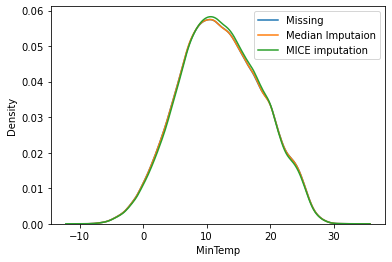

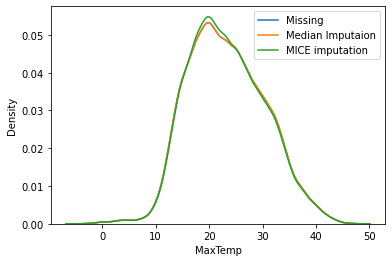

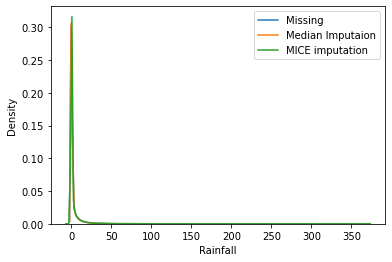

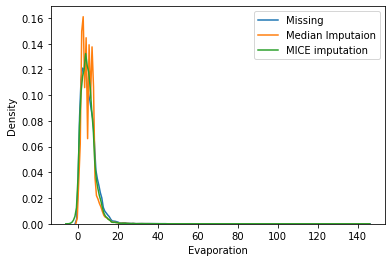

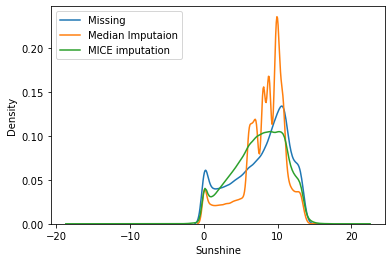

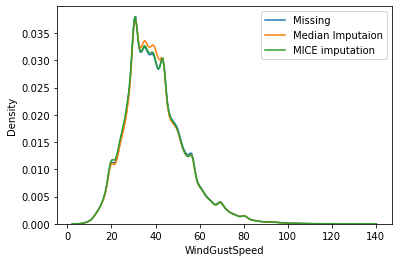

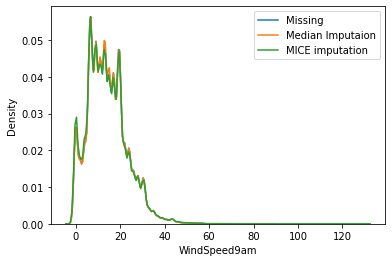

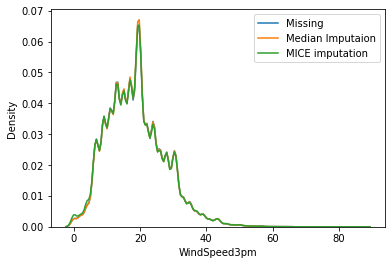

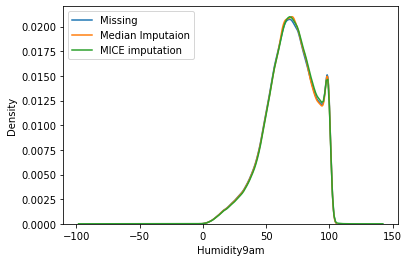

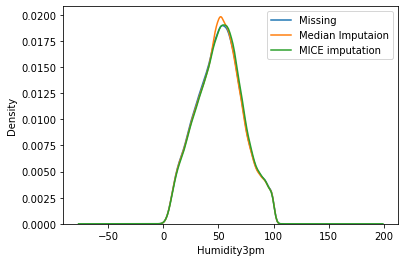

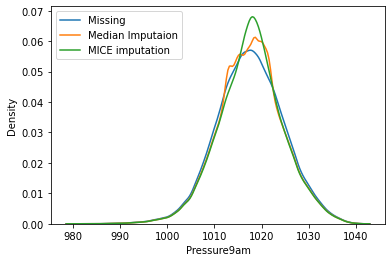

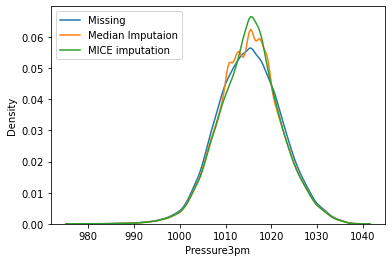

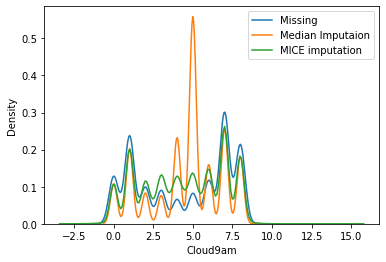

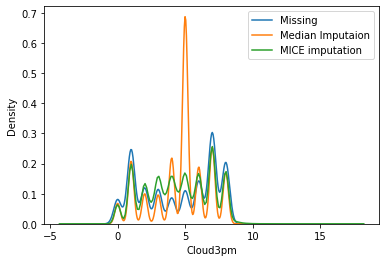

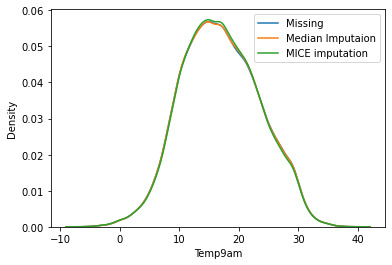

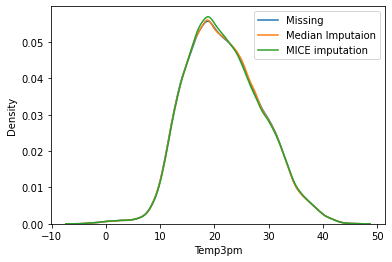

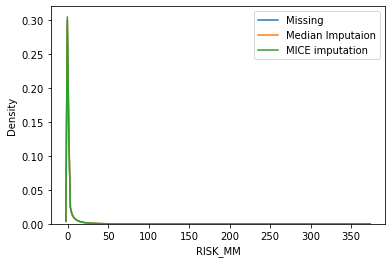

In [45]:
for features in continuous_features:
    sns.kdeplot(x = data[features] )    # kdeplot of the continuous features of our original data
    sns.kdeplot(x = df_copy[features])  # kdeplot of the continuous features of our data which we used for median imputation approach
    sns.kdeplot(x = data_comp_clean[features])    # kdeplot of the continuous features of our data which we used for MICE imputation approach.
    plt.xlabel(features)                         # giving x label for each feature
    plt.legend(labels = ["Missing","Median Imputaion","MICE imputation"])   # providing legends
    plt.show()           # showing our individual plots